In [3]:
!pip install autoviz

Note: you may need to restart the kernel to use updated packages.


In [5]:
from autoviz.AutoViz_Class import AutoViz_Class

AV=AutoViz_Class()

Imported AutoViz_Class version: 0.0.81. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.


In [132]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [133]:
bank=pd.read_csv('bank-full.csv',';')

In [134]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [10]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [11]:
bank.shape

(45211, 17)

In [12]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [105]:
bank.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,1.000000,-0.021868,-0.403240,-0.106807,-0.017879,0.097783,-0.185513,-0.015655,0.026221,-0.009120,-0.042357,-0.004648,0.004760,-0.023758,0.001288,0.007367,0.025155
job,-0.021868,1.000000,0.062045,0.166707,-0.006853,0.018232,-0.125363,-0.033004,-0.082063,0.022856,-0.092870,0.004744,0.006839,-0.024455,-0.000911,0.011010,0.040438
marital,-0.403240,0.062045,1.000000,0.108576,-0.007023,0.002122,-0.016096,-0.046893,-0.039201,-0.005261,-0.006991,0.011852,-0.008994,0.019172,0.014973,-0.016850,0.045588
education,-0.106807,0.166707,0.108576,1.000000,-0.010718,0.064514,-0.090790,-0.048574,-0.110928,0.022671,-0.057304,0.001935,0.006255,0.000052,0.017570,-0.019361,0.066241
default,-0.017879,-0.006853,-0.007023,-0.010718,1.000000,-0.066745,-0.006025,0.077234,0.015404,0.009424,0.011486,-0.010021,0.016822,-0.029979,-0.018329,0.034898,-0.022419
balance,0.097783,0.018232,0.002122,0.064514,-0.066745,1.000000,-0.068768,-0.084350,-0.027273,0.004503,0.019777,0.021560,-0.014578,0.003435,0.016674,-0.020967,0.052838
housing,-0.185513,-0.125363,-0.016096,-0.090790,-0.006025,-0.068768,1.000000,0.041323,0.188123,-0.027982,0.271481,0.005075,-0.023599,0.124178,0.037076,-0.099971,-0.139173
loan,-0.015655,-0.033004,-0.046893,-0.048574,0.077234,-0.084350,0.041323,1.000000,-0.010873,0.011370,0.022145,-0.012412,0.009980,-0.022754,-0.011043,0.015458,-0.068185
contact,0.026221,-0.082063,-0.039201,-0.110928,0.015404,-0.027273,0.188123,-0.010873,1.000000,-0.027936,0.361145,-0.020839,0.019614,-0.244816,-0.147811,0.272214,-0.148395
day,-0.009120,0.022856,-0.005261,0.022671,0.009424,0.004503,-0.027982,0.011370,-0.027936,1.000000,-0.006028,-0.030206,0.162490,-0.093044,-0.051710,0.083460,-0.028348


Shape of your Data Set: (45211, 17)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  7
    Number of String-Categorical Columns =  6
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  4
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    17 Predictors classified...
        This does not include the Target column(s)
        No variables removed since no ID or low-information variables found in data set
Number of All Scatter Plots = 28


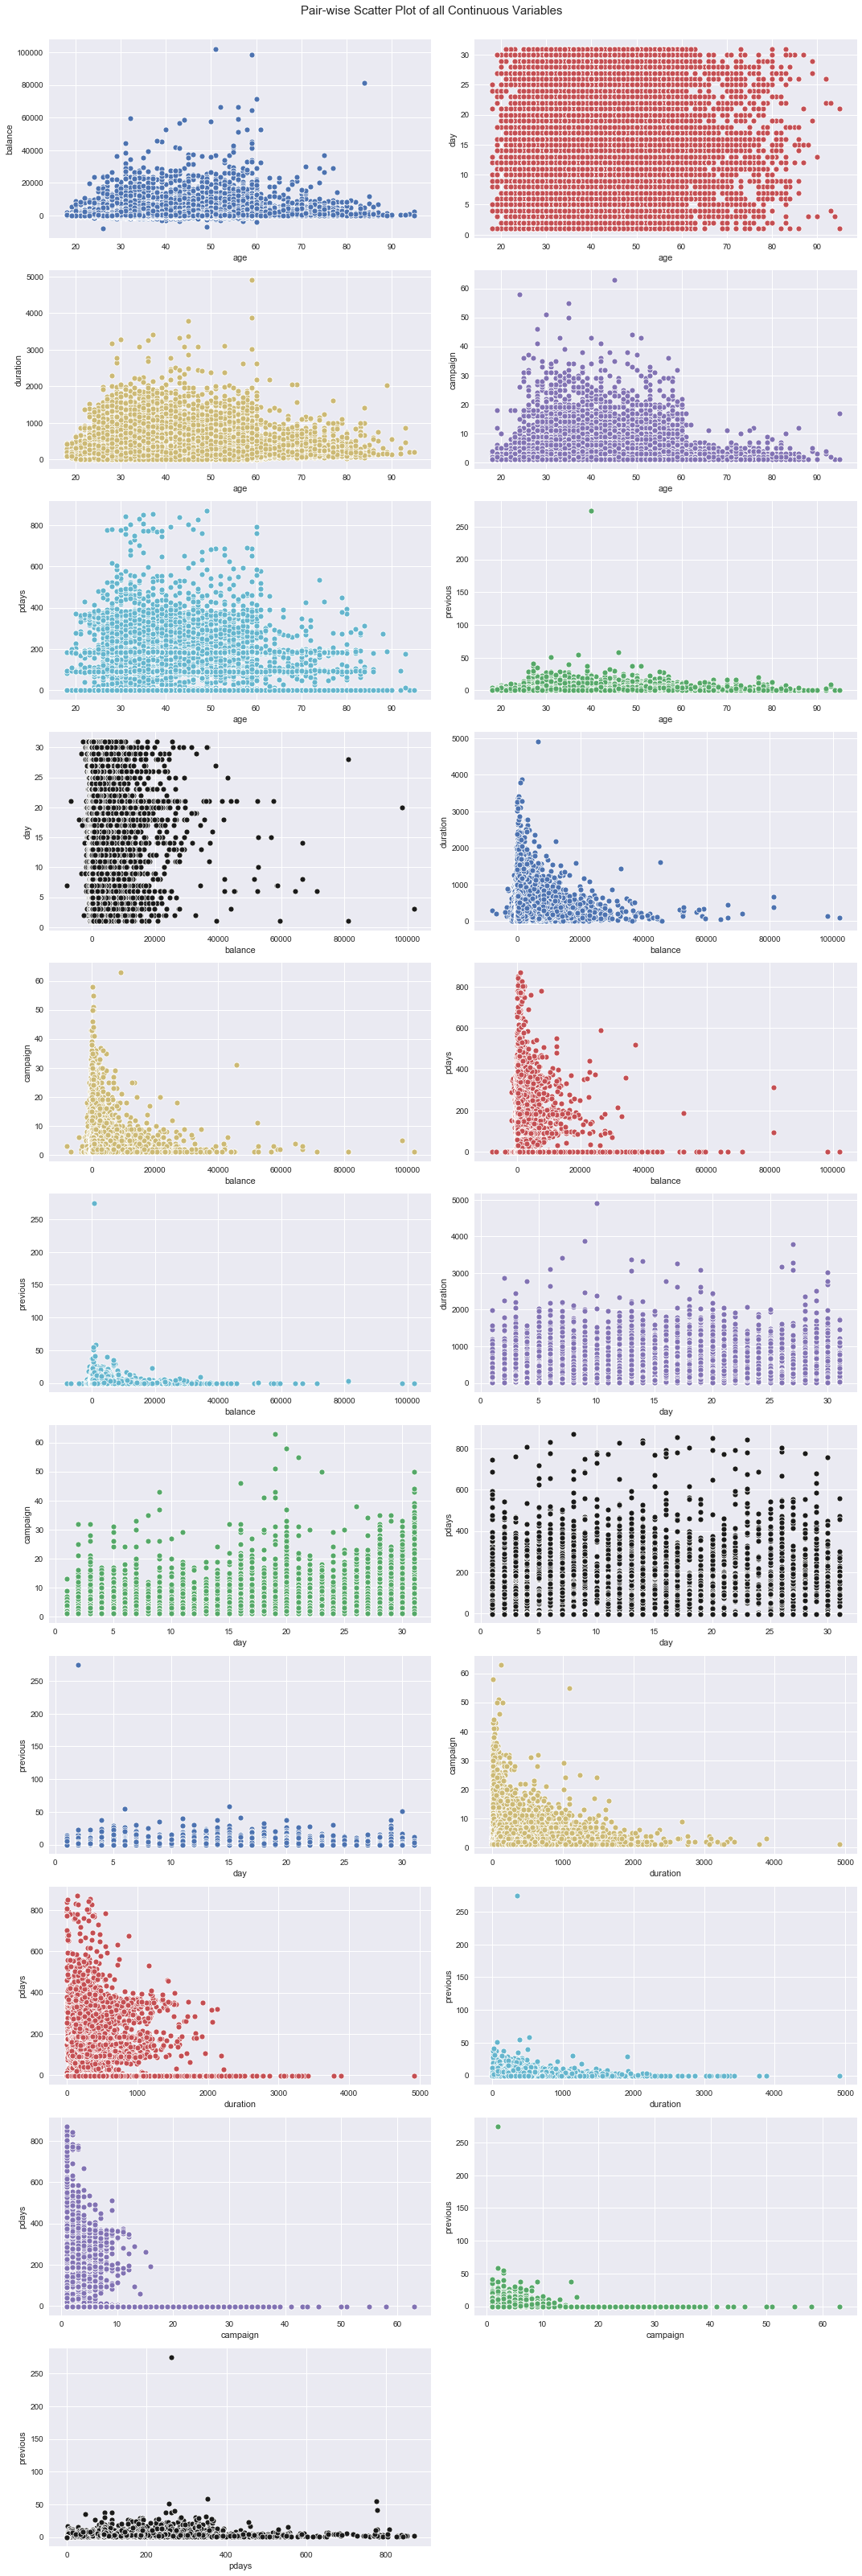

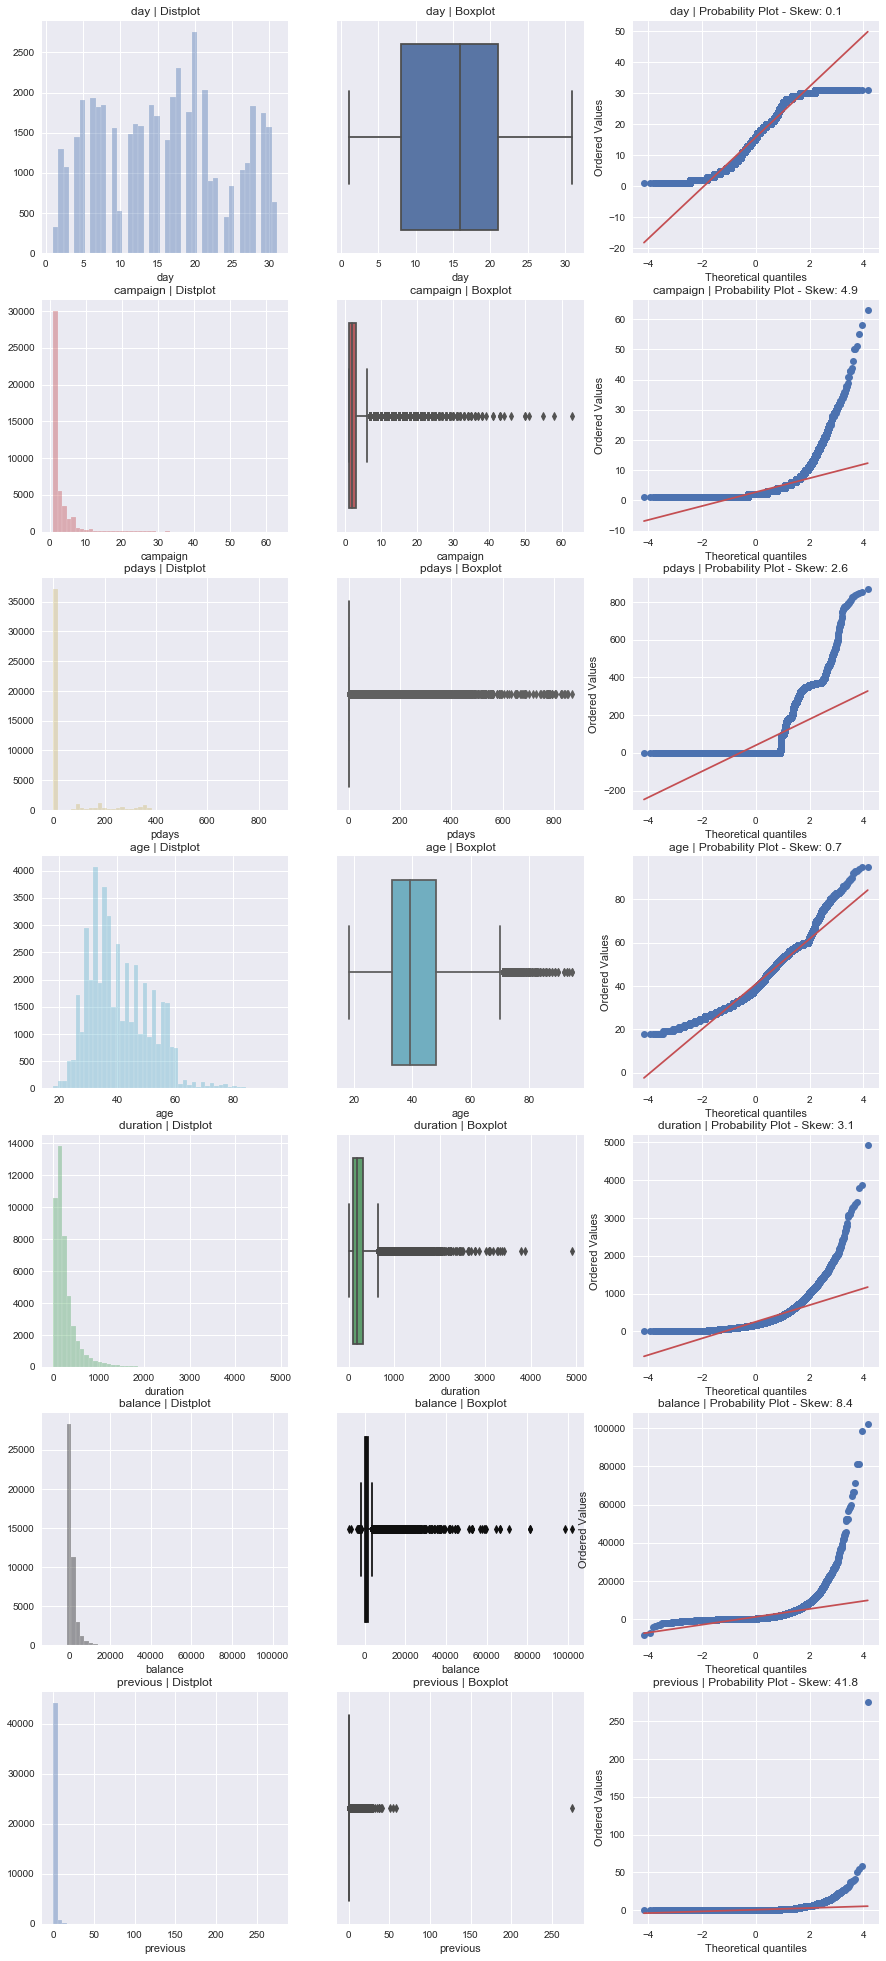

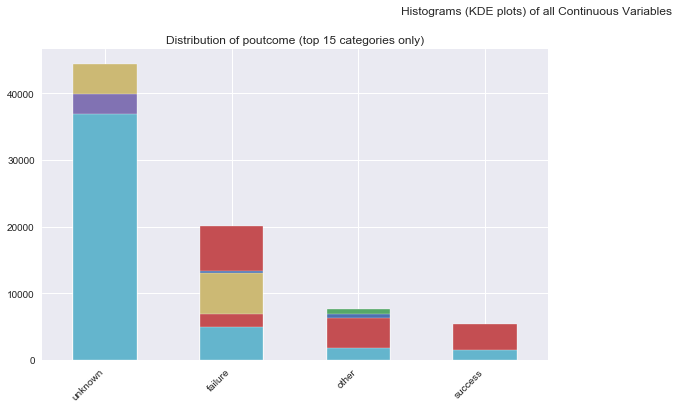

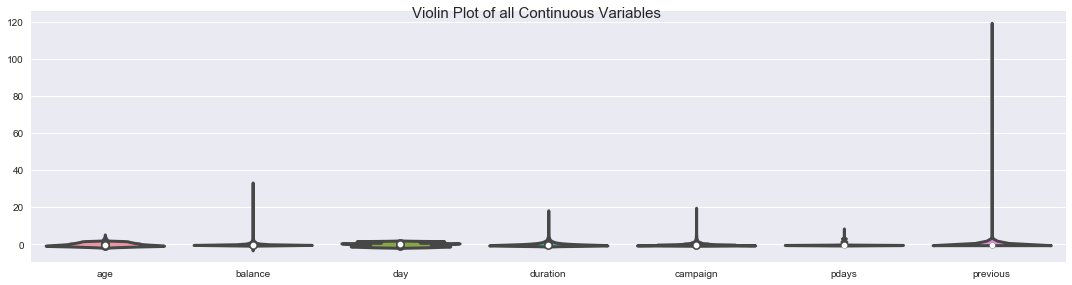

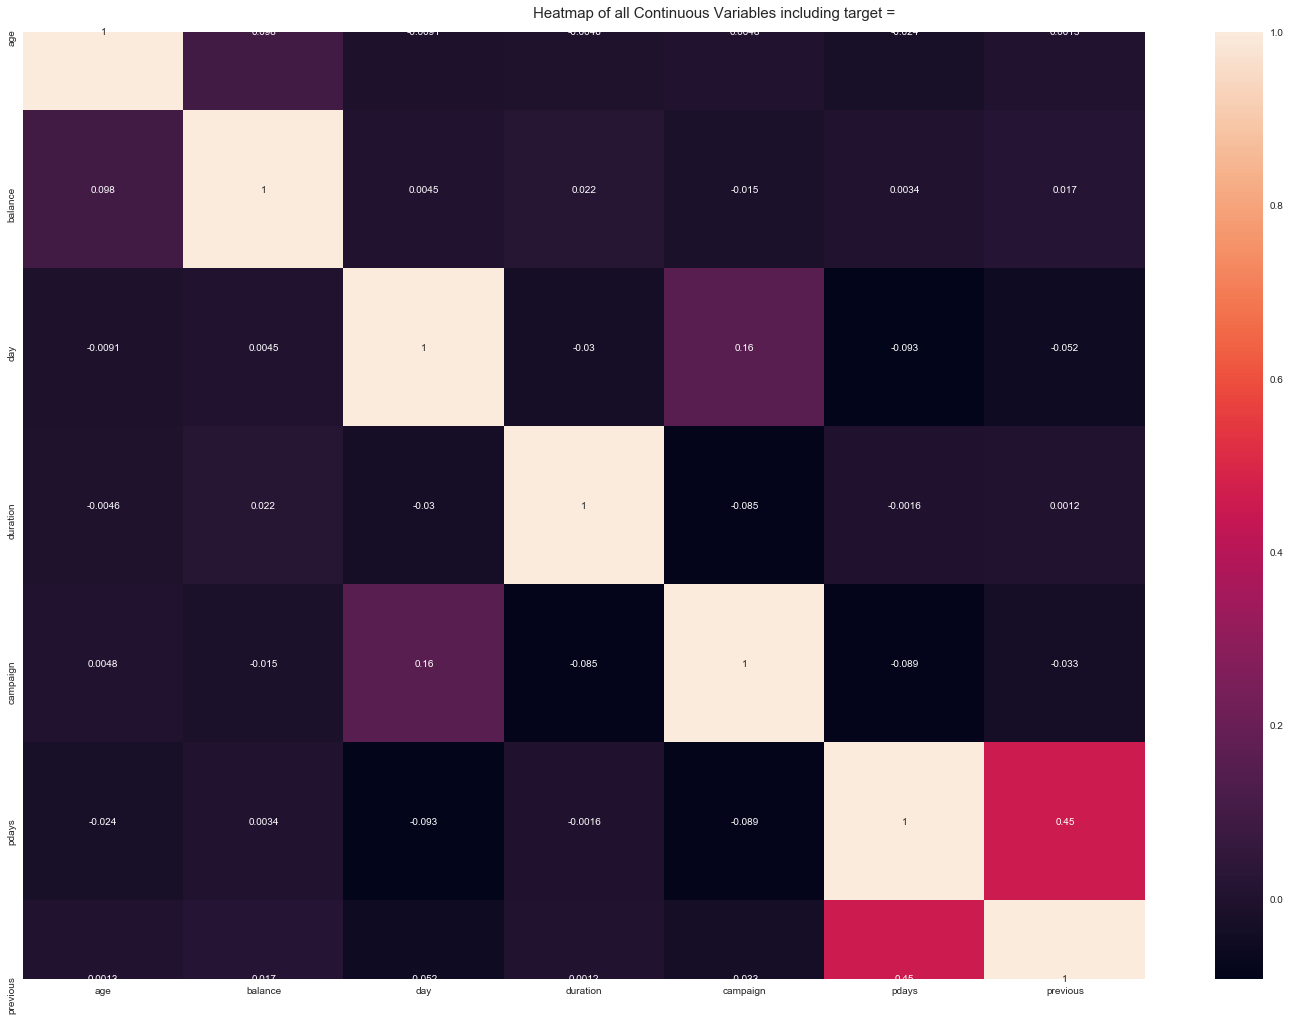

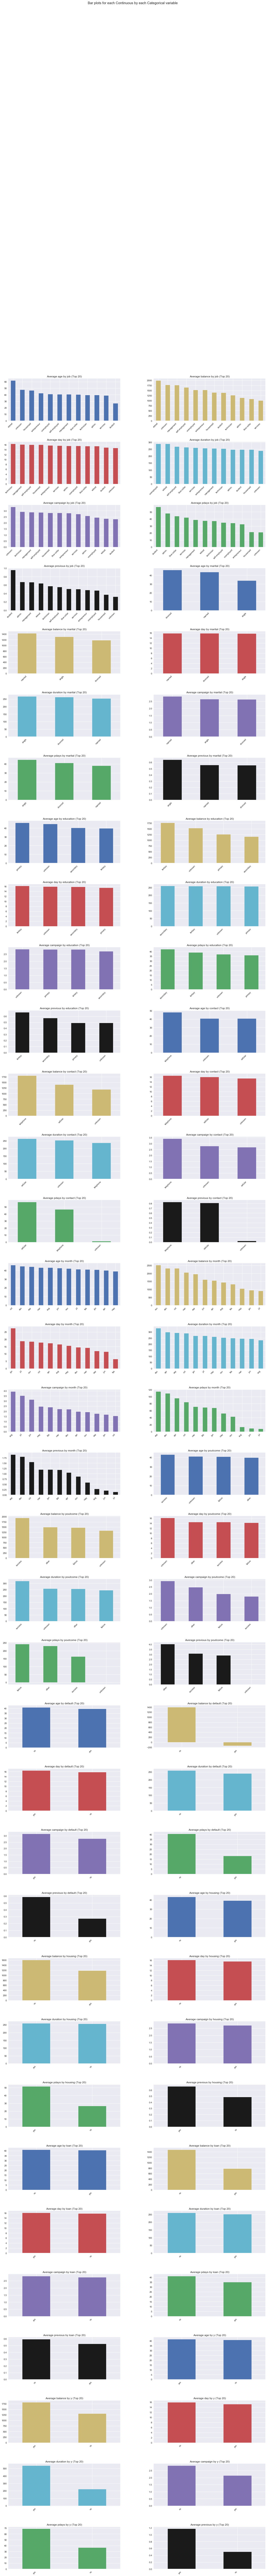

Time to run AutoViz (in seconds) = 40.782

 ###################### VISUALIZATION Completed ########################


In [16]:
filename='bank-full.csv'
sep=';'
dft = AV.AutoViz(filename, sep=';', depVar="", dfte=None, header=0, verbose=0, lowess=False, 
                 chart_format='svg', max_rows_analyzed=150000, max_cols_analyzed=30)

In [13]:
uniqueValues = bank['marital'].unique()
print(uniqueValues)

['married' 'single' 'divorced']


In [14]:
uniqueValues = bank['education'].unique()
print(uniqueValues)

['tertiary' 'secondary' 'unknown' 'primary']


In [15]:
uniqueValues = bank['contact'].unique()
print(uniqueValues)

['unknown' 'cellular' 'telephone']


In [16]:
uniqueValues = bank['month'].unique()
print(uniqueValues)

['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']


In [17]:
uniqueValues = bank['poutcome'].unique()
print(uniqueValues)

['unknown' 'failure' 'other' 'success']


In [135]:
#label encoding
from sklearn.preprocessing import LabelEncoder
cols=['job','marital','education','default','housing','loan','contact','month','poutcome','y']
le= LabelEncoder()
for col in cols:
    bank[col]=le.fit_transform(bank[col])


In [110]:
bank.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
5,35,4,1,2,0,231,1,0,2,5,8,139,1,-1,0,3,0
6,28,4,2,2,0,447,1,1,2,5,8,217,1,-1,0,3,0
7,42,2,0,2,1,2,1,0,2,5,8,380,1,-1,0,3,0
8,58,5,1,0,0,121,1,0,2,5,8,50,1,-1,0,3,0
9,43,9,2,1,0,593,1,0,2,5,8,55,1,-1,0,3,0


In [136]:
X=bank.iloc[:,0:16]
y=bank.iloc[:,16]

In [137]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [138]:
X_train,X_test,y_train,y_test=(train_test_split(X,y,test_size=.3,random_state=100))


In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [151]:
model=LogisticRegression(solver='liblinear')
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [140]:
model.score(X_train,y_train)*100

89.1616898916169

In [141]:
model.score(X_test,y_test)*100

88.91919787673253

In [142]:
lr_prediction=model.predict(X_test)
print("logistic regression accuracy is:", metrics.accuracy_score(lr_prediction,y_test)*100)
from sklearn.model_selection import cross_val_score
score=cross_val_score(model,X,y,cv=5)
print('cross validation score is:',np.mean(score)*100)

logistic regression accuracy is: 88.91919787673253
cross validation score is: 87.60240718977414


In [143]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix=confusion_matrix(lr_prediction,y_test)
print(confusion_matrix)
report=classification_report(lr_prediction,y_test)
print(report)

[[11743  1261]
 [  242   318]]
              precision    recall  f1-score   support

           0       0.98      0.90      0.94     13004
           1       0.20      0.57      0.30       560

    accuracy                           0.89     13564
   macro avg       0.59      0.74      0.62     13564
weighted avg       0.95      0.89      0.91     13564



In [144]:
from sklearn.metrics import  mean_squared_error
mse=mean_squared_error(y_test,lr_prediction)
rmse=np.sqrt(mse)
print('RMSE value:{:.2f}'.format(rmse))
#Based on a rule of thumb, it can be said that RMSE values between 0.2 and 0.5 shows that the model can relatively predict the data accurately

RMSE value:0.33


In [145]:
from sklearn.metrics import r2_score
print('r2 score:{:.2f}'.format(r2_score(y_test,lr_prediction)))

r2 score:-0.08


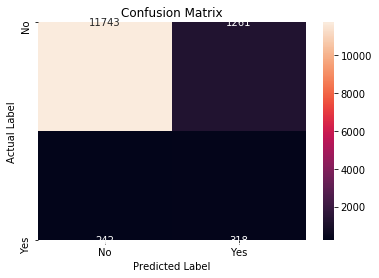

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt
class_label = ["No", "Yes"]
df_cm = pd.DataFrame(confusion_matrix, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

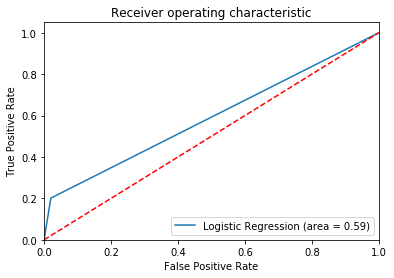

In [147]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test,model.predict(X_test))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [152]:
from sklearn.feature_selection import chi2
f_p_values=chi2(X_train,y_train)

ValueError: Input X must be non-negative.